In [1]:
import adios2 as ad2
import numpy as np
import pickle
import os
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
font = {'size'   : 12}
matplotlib.rc('font', **font)

In [2]:
def histplot(energy_list):
    for dataname in dataname_list:
        x = np.concatenate(energy_list[dataname])
        if len(x) > 0:
            print(dataname, x.min(), x.max(), x.mean(), x.std())
            h, bins = np.histogram(x, bins=50)
            plt.figure(figsize=[6,3])
            plt.hist(x, bins=50, density=True, log=True)
            plt.title(dataname)
        else:
            print(dataname, "no data")    

In [3]:
def histplot2(dataset_list, name):
    datasetname = ["trainset", "valset", "testset"]
    for dataname in tqdm(dataname_list, desc="hist2"):
        fname = f"hist-3set-{name}-h-{dataname}.npz"
        if not os.path.exists(fname):
            xa = np.concatenate(dataset_list[dataname])
            h, bins = np.histogram(xa, bins=50)
            np.savez(fname, h=h, bins=bins)
        else:
            with np.load(fname) as f:
                h = f["h"]
                bins = f["bins"]

        plt.figure(figsize=[6, 3])
        for i in range(3):
            x = dataset_list[dataname][i]
            if len(x) > 0:
                # print(dataname, x.min(), x.max(), x.mean(), x.std())
                fname = f"hist-3set-{name}-h-{dataname}-{i}.npz"
                if not os.path.exists(fname):
                    h, _ = np.histogram(x, bins=bins, density=True)
                    np.savez(fname, h=h)
                else:
                    with np.load(fname) as f:
                        h = f["h"]
                plt.bar(
                    0.5 * bins[:-1] + 0.5 * bins[1:],
                    h,
                    width=bins[1] - bins[0],
                    alpha=0.2,
                    label="_Hidden",
                )
                # h, _, _ = plt.hist(x, bins=bins, alpha=0.2, label="_Hidden")
                xs = list()
                ys = list()
                xs.append(bins[0])
                ys.append(0)
                for k in range(len(h)):
                    xs.append(bins[k])
                    xs.append(bins[k + 1])
                    ys.append(h[k])
                    ys.append(h[k])
                xs.append(bins[-1])
                ys.append(0)
                plt.plot(xs, ys, label=datasetname[i])
            else:
                print(dataname, "no data")
        plt.yscale("log")
        plt.title(dataname.replace("-v3", ""))
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"hist_3set-{name}-{dataname}.pdf")

In [4]:
def histplot3(dataset_list, name, xlabel="xlabel", loc=1):
    datasetname = ["trainset", "valset", "testset"]
    fig, ax = plt.subplots(1, 5, sharey=True, figsize=[16, 2.8])
    for p, dataname in tqdm(enumerate(dataname_list), desc="hist3", total=len(dataname_list)):
        fname = f"hist-3set-{name}-h-{dataname}.npz"
        if not os.path.exists(fname):
            xa = np.concatenate(dataset_list[dataname])
            h, bins = np.histogram(xa, bins=50)
            np.savez(fname, h=h, bins=bins)
        else:
            with np.load(fname) as f:
                h = f["h"]
                bins = f["bins"]

        for i in range(3):
            x = dataset_list[dataname][i]
            if len(x) > 0:
                # print(dataname, x.min(), x.max(), x.mean(), x.std())
                fname = f"hist-3set-{name}-h-{dataname}-{i}.npz"
                if not os.path.exists(fname):
                    h, _ = np.histogram(x, bins=bins, density=True)
                    np.savez(fname, h=h)
                else:
                    with np.load(fname) as f:
                        h = f["h"]
                ax[p].bar(
                    0.5 * bins[:-1] + 0.5 * bins[1:],
                    h,
                    width=bins[1] - bins[0],
                    alpha=0.2,
                    label="_Hidden",
                )
                xs = list()
                ys = list()
                xs.append(bins[0])
                ys.append(0)
                for k in range(len(h)):
                    xs.append(bins[k])
                    xs.append(bins[k + 1])
                    ys.append(h[k])
                    ys.append(h[k])
                xs.append(bins[-1])
                ys.append(0)
                ax[p].plot(xs, ys, label=datasetname[i])
            else:
                print(dataname, "no data")
        ax[p].set_yscale("log")
        ax[p].set_title(dataname.replace("-v3", ""))
        ax[p].tick_params(axis="x", labelrotation=30)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend(loc=loc, prop={"size": 10})
    fig.text(0.5, 0.05, xlabel, ha='center', va='center', fontsize=16)
    fig.savefig(f"hist_3set-{name}-all.pdf")

In [5]:
prefix = "examples/multidataset/dataset"
# dataname_list = ["ANI1x", "MPTrj", "qm7x", "OC2022", "OC2020", "OC2020-20M"]
# dataname_list = ["ANI1x", "MPTrj", "qm7x", "OC2022", "OC2020"]
# suffix=""

# dataname_list = ["ANI1x-v2", "MPTrj-v2", "qm7x-v2", "OC2022-v2", "OC2020-v2", "OC2020-20M-v2"]
# dataname_list = ["ANI1x-v2", "MPTrj-v2", "qm7x-v2", "OC2022-v2", "OC2020-v2"]
# suffix="-v2"

dataname_list = ["ANI1x-v3", "MPTrj-v3", "qm7x-v3", "OC2022-v3", "OC2020-v3", "OC2020-20M-v3"]
# dataname_list = ["ANI1x-v3", "MPTrj-v3", "qm7x-v3", "OC2022-v3", "OC2020-v3"]
suffix="-v3"

## Num. of atoms

In [6]:
natom_list = dict()
for dataname in dataname_list:
    natom_list[dataname] = list()
    for label in ["trainset", "valset", "testset"]:
        print (dataname, label)
        with ad2.open(os.path.join(prefix, dataname + ".bp"), "r") as f:
            f.__next__()
            natom = f.read(f"{label}/pos/variable_count")
            print(natom.shape)
            natom_list[dataname].append(natom)

ANI1x-v3 trainset
(4460335,)
ANI1x-v3 valset
(247799,)
ANI1x-v3 testset
(247871,)
MPTrj-v3 trainset
(1422196,)
MPTrj-v3 valset
(79011,)
MPTrj-v3 testset
(79020,)
qm7x-v3 trainset
(3775698,)
qm7x-v3 valset
(209761,)
qm7x-v3 testset
(209778,)
OC2022-v3 trainset
(7584541,)
OC2022-v3 valset
(842810,)
OC2022-v3 testset
(407409,)
OC2020-v3 trainset
(120540615,)
OC2020-v3 valset
(13393402,)
OC2020-v3 testset
(995000,)
OC2020-20M-v3 trainset
(17999999,)
OC2020-20M-v3 valset
(2000000,)
OC2020-20M-v3 testset
(995000,)


ANI1x-v3 2 63 15.274496494656482 6.032093769524225
MPTrj-v3 1 444 31.189468348534735 29.572831615514307
qm7x-v3 4 23 16.846642752244986 2.3816630745538663
OC2022-v3 17 228 79.84137520430663 26.346678270319195
OC2020-v3 7 225 73.25099719654817 30.958564530735096
OC2020-20M-v3 7 225 73.25818624711532 30.95346837293802


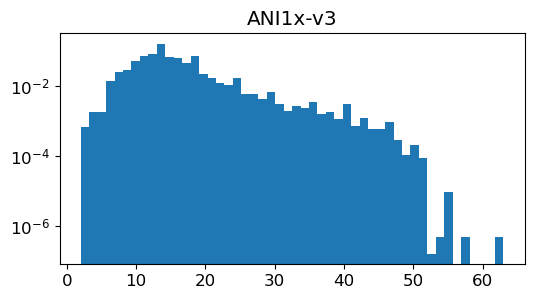

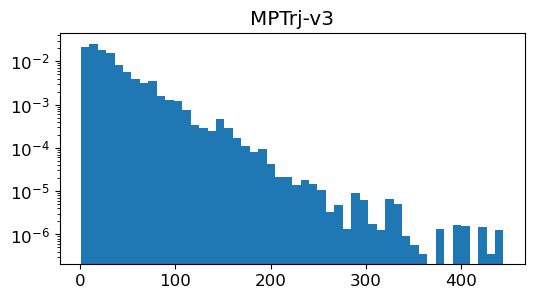

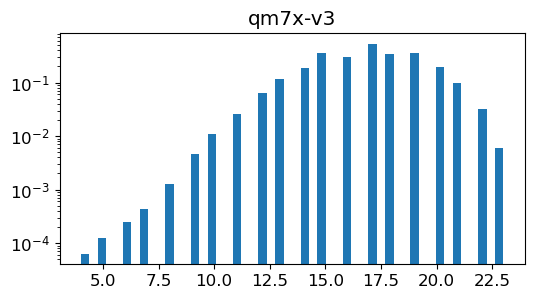

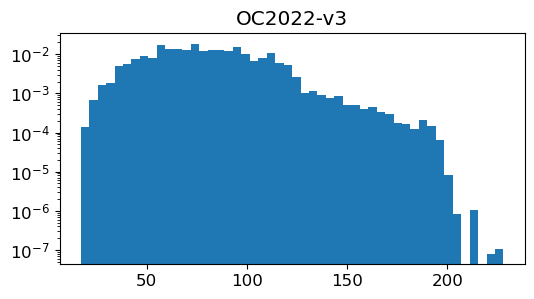

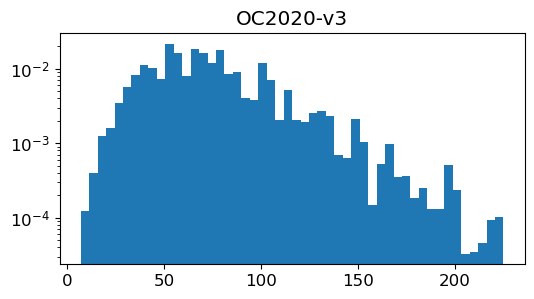

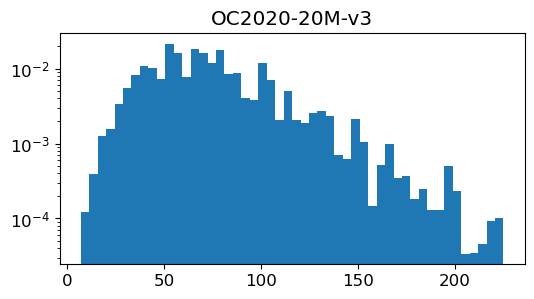

In [7]:
for dataname in dataname_list:
    x = np.concatenate(natom_list[dataname])
    print(dataname, x.min(), x.max(), x.mean(), x.std())
    h, bins = np.histogram(x, bins=50)
    plt.figure(figsize=[6,3])
    plt.hist(x, bins=50, density=True, log=True)
    plt.title(dataname)

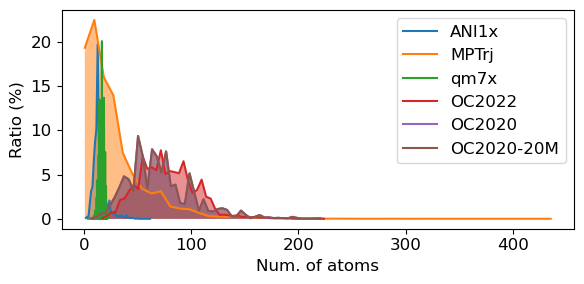

In [8]:
plt.figure(figsize=[6,3])
for dataname in dataname_list:
    x = np.concatenate(natom_list[dataname])
    h, bins = np.histogram(x, bins=50, density=True)
    # print(dataname, np.cumsum(h*(bins[1]-bins[0])))
    # plt.fill(bins[1:], h*(bins[1]-bins[0]), alpha=0.5, label=dataname)
    plt.plot(bins[:-1], h*(bins[1]-bins[0])*100, label=dataname.replace("-v3", ""))
    plt.fill_between(bins[:-1], h*(bins[1]-bins[0])*100, alpha=0.5, label='_nolegend_')
    # plt.yscale("log")
    plt.xlabel("Num. of atoms")
    plt.ylabel("Ratio (%)")
plt.legend()
plt.tight_layout()
plt.savefig(f"hist-atoms{suffix}.pdf")

## Num. of edges

In [9]:
edge_list = dict()
for dataname in dataname_list:
    edge_list[dataname] = list()
    for label in ["trainset", "valset", "testset"]:
        print (dataname, label)
        with ad2.open(os.path.join(prefix, dataname + ".bp"), "r") as f:
            f.__next__()
            nedge = f.read(f"{label}/edge_attr/variable_count")
            print(nedge.shape)
            edge_list[dataname].append(nedge)

ANI1x-v3 trainset
(4460335,)
ANI1x-v3 valset
(247799,)
ANI1x-v3 testset
(247871,)
MPTrj-v3 trainset
(1422196,)
MPTrj-v3 valset
(79011,)
MPTrj-v3 testset
(79020,)
qm7x-v3 trainset
(3775698,)
qm7x-v3 valset
(209761,)
qm7x-v3 testset
(209778,)
OC2022-v3 trainset
(7584541,)
OC2022-v3 valset
(842810,)
OC2022-v3 testset
(407409,)
OC2020-v3 trainset
(120540615,)
OC2020-v3 valset
(13393402,)
OC2020-v3 testset
(995000,)
OC2020-20M-v3 trainset
(17999999,)
OC2020-20M-v3 valset
(2000000,)
OC2020-20M-v3 testset
(995000,)


ANI1x-v3 2 1608 211.93642056454746 159.26570179932958
MPTrj-v3 0 13198 461.92103919247046 665.4753395831951
qm7x-v3 12 496 243.23024086601066 66.97227798410941
OC2022-v3 128 8986 2143.5223349587313 1122.5305457513257
OC2020-v3 12 10534 1606.803501436611 1111.4735912497406
OC2020-20M-v3 12 10520 1606.7858164699126 1111.3368253833705


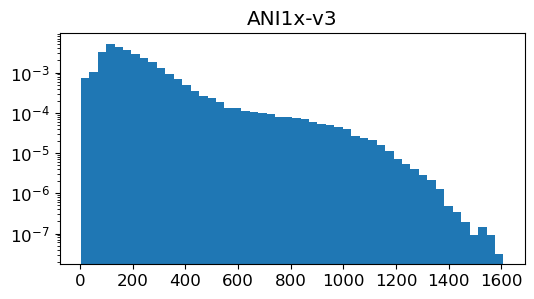

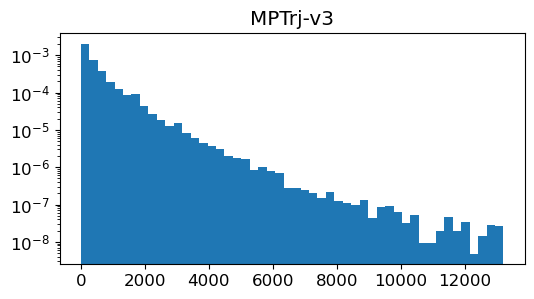

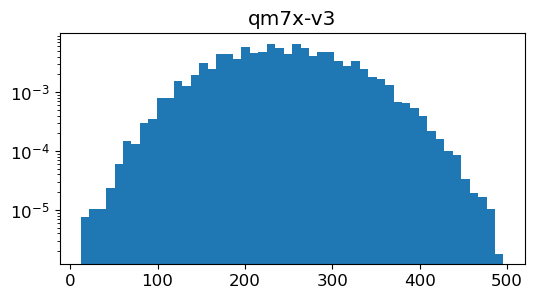

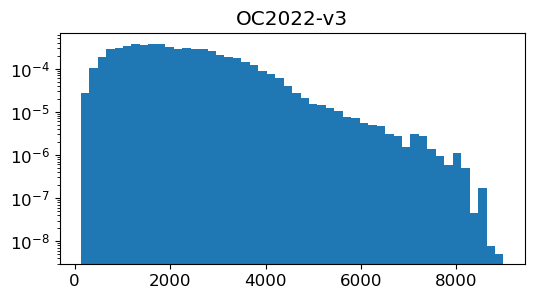

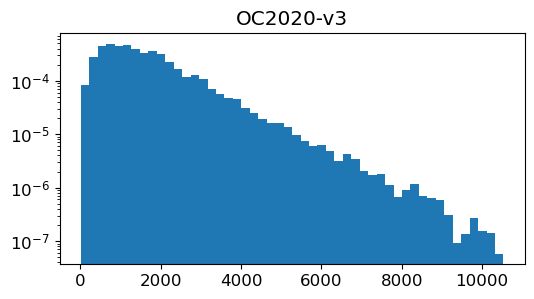

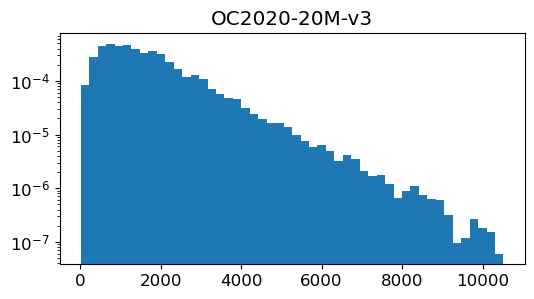

In [10]:
for dataname in dataname_list:
    x = np.concatenate(edge_list[dataname])
    print(dataname, x.min(), x.max(), x.mean(), x.std())
    h, bins = np.histogram(x, bins=50)
    plt.figure(figsize=[6,3])
    plt.hist(x, bins=50, density=True, log=True)
    plt.title(dataname)

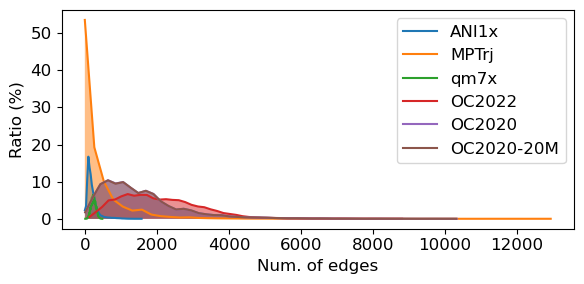

In [11]:
plt.figure(figsize=[6,3])
for dataname in dataname_list:
    x = np.concatenate(edge_list[dataname])
    h, bins = np.histogram(x, bins=50, density=True)
    # print(dataname, np.cumsum(h*(bins[1]-bins[0])))
    # plt.fill(bins[1:], h*(bins[1]-bins[0]), alpha=0.5, label=dataname)
    plt.plot(bins[:-1], h*(bins[1]-bins[0])*100, label=dataname.replace("-v3", ""))
    plt.fill_between(bins[:-1], h*(bins[1]-bins[0])*100, alpha=0.5, label='_nolegend_')
    # plt.yscale("log")
    plt.xlabel("Num. of edges")
    plt.ylabel("Ratio (%)")
plt.legend()
plt.tight_layout()
plt.savefig(f"hist-edges{suffix}.pdf")

## Energy

In [12]:
cd /lustre/orion/world-shared/cph161/jyc/frontier/HydraGNN-gb24

/lustre/orion/cph161/world-shared/jyc/frontier/HydraGNN-gb24


In [24]:
energy_list = dict()
for dataname in dataname_list:
    energy_list[dataname] = list()
    for label in ["trainset", "valset", "testset"]:
        print (dataname, label)
        with ad2.open(os.path.join(prefix, dataname + ".bp"), "r") as f:
            f.__next__()
            energy = f.read(f"{label}/y")
            energy2 = f.read(f"{label}/energy")
            assert np.allclose(energy, energy2)
            print(energy.shape)
            energy_list[dataname].append(energy)

ANI1x-v3 trainset
(4460335, 1)
ANI1x-v3 valset
(247799, 1)
ANI1x-v3 testset
(247871, 1)
MPTrj-v3 trainset
(1422196,)
MPTrj-v3 valset
(79011,)
MPTrj-v3 testset
(79020,)
qm7x-v3 trainset
(3775698,)
qm7x-v3 valset
(209761,)
qm7x-v3 testset
(209778,)
OC2022-v3 trainset
(7584541,)
OC2022-v3 valset
(842810,)
OC2022-v3 testset
(407409,)
OC2020-v3 trainset
(120540615,)
OC2020-v3 valset
(13393402,)
OC2020-v3 testset
(995000,)
OC2020-20M-v3 trainset
(17999999,)
OC2020-20M-v3 valset
(2000000,)
OC2020-20M-v3 testset
(995000,)


ANI1x-v3 -0.03907776 0.10897827 5.614973e-08 0.0064779613
MPTrj-v3 -4.3795958 9.891445 -7.966261e-10 0.6926824
qm7x-v3 -0.5088501 1.1589355 2.8013553e-06 0.16951331
OC2022-v3 -277.11557 140.97452 -1.0578678e-09 0.42587683
OC2020-v3 -129.0625 10.31657 -4.0010367e-10 0.26403916
OC2020-20M-v3 -30.808363 10.279333 3.4940048e-10 0.2637729


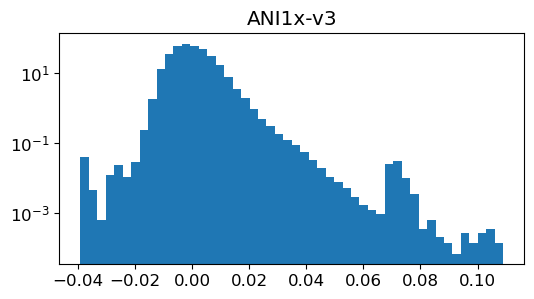

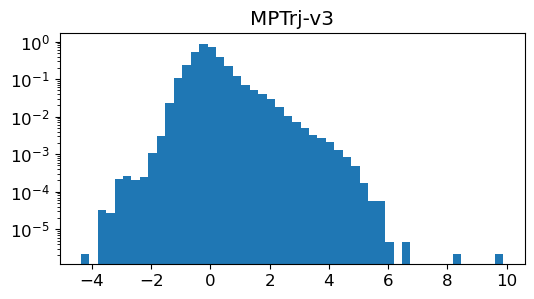

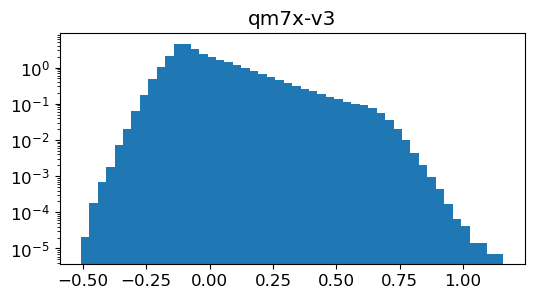

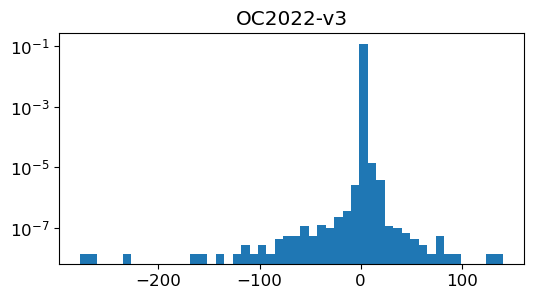

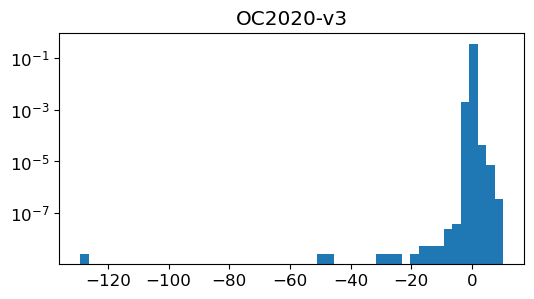

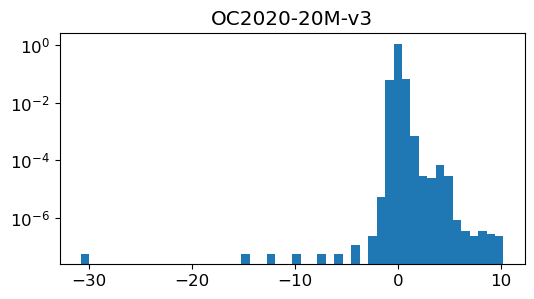

In [14]:
for dataname in dataname_list:
    x = np.concatenate(energy_list[dataname])
    if len(x) > 0:
        print(dataname, x.min(), x.max(), x.mean(), x.std())
        h, bins = np.histogram(x, bins=50)
        plt.figure(figsize=[6,3])
        plt.hist(x, bins=50, density=True, log=True)
        plt.title(dataname)
    else:
        print(dataname, "no data")

/tmp/ipykernel_2853024/1509085384.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


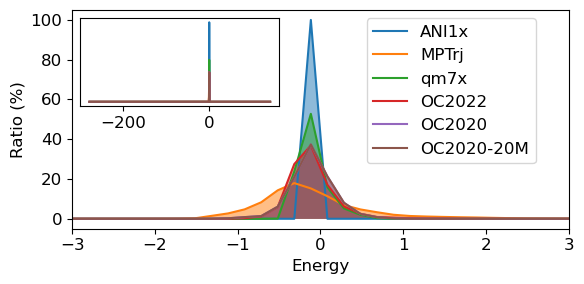

In [15]:
plt.figure(figsize=[6,3])
min_list = list()
max_list = list()
for dataname in dataname_list:
    min_list.append(energy_list[dataname][0].min())
    min_list.append(energy_list[dataname][1].min())
    min_list.append(energy_list[dataname][2].min())
    max_list.append(energy_list[dataname][0].max())
    max_list.append(energy_list[dataname][1].max())
    max_list.append(energy_list[dataname][2].max())
mn, mx = min(min_list), max(max_list)
bins = np.arange(mn, mx, 0.2)

for dataname in dataname_list:
    x = np.concatenate(energy_list[dataname])
    h, bins = np.histogram(x, bins=bins, density=True)
    # print(dataname, np.cumsum(h*(bins[1]-bins[0])))
    # plt.fill(bins[1:], h*(bins[1]-bins[0]), alpha=0.5, label=dataname)
    plt.plot(bins[:-1], h*(bins[1]-bins[0])*100, label=dataname.replace("-v3", ""))
    plt.fill_between(bins[:-1], h*(bins[1]-bins[0])*100, alpha=0.5, label='_nolegend_')
    # plt.yscale("log")
    plt.xlabel("Energy")
    plt.ylabel("Ratio (%)")
plt.xlim([-3,+3])
# plt.ylim([1e-5,1e3])
# plt.yscale('log')
plt.legend(loc="upper right", bbox_to_anchor=(0.95, 1.0))


# Create an inset axis within the main plot
ax = plt.gca()
ax = inset_axes(ax, width="40%", height="40%", loc='upper left')
for dataname in dataname_list:
    x = np.concatenate(energy_list[dataname])
    h, bins = np.histogram(x, bins=bins, density=True)
    # print(dataname, np.cumsum(h*(bins[1]-bins[0])))
    # plt.fill(bins[1:], h*(bins[1]-bins[0]), alpha=0.5, label=dataname)
    ax.plot(bins[:-1], h*(bins[1]-bins[0])*100, label=dataname.replace("-v3", ""))
    ax.fill_between(bins[:-1], h*(bins[1]-bins[0])*100, alpha=0.5, label='_nolegend_')
    # plt.yscale("log")
    # ax.xlabel("Energy")
    # ax.ylabel("Ratio (%)")
    ax.set_yticks([])

plt.tight_layout()
plt.savefig(f"hist-energy{suffix}.pdf")

## Force

In [ ]:
force_list = dict()
for dataname in dataname_list:
    force_list[dataname] = list()
    for label in ["trainset", "valset", "testset"]:
        print (dataname, label)
        with ad2.open(os.path.join(prefix, dataname + ".bp"), "r") as f:
            f.__next__()
            ## atomic number , coordinates, forces
            force = f.read(f"{label}/x")[:,4:7]
            force2 = f.read(f"{label}/force")
            assert np.allclose(force, force2)
            print(force.shape)
            force_list[dataname].append(force)

ANI1x-v3 trainset
(68131530, 3)
ANI1x-v3 valset
(3783677, 3)
ANI1x-v3 testset
(3785274, 3)
MPTrj-v3 trainset
(44361297, 3)
MPTrj-v3 valset
(2460689, 3)
MPTrj-v3 testset
(2464454, 3)
qm7x-v3 trainset
(63608162, 3)
qm7x-v3 valset
(3534265, 3)
qm7x-v3 testset
(3533232, 3)
OC2022-v3 trainset
(605971138, 3)
OC2022-v3 valset
(67415142, 3)
OC2022-v3 testset


In [ ]:
# for dataname in dataname_list:
#     fname = f"hist-h-{dataname}.npz"
#     if not os.path.exists(fname):
#         x = np.concatenate(force_list[dataname])
#         x = np.linalg.norm(x, axis=-1)
#         print(dataname, x.min(), x.max(), x.mean(), x.std())
#         h, bins = np.histogram(x, bins=50)
#         np.savez(f"hist-h-{dataname}.npz", h=h)
        
#         plt.figure(figsize=[6,3])
#         plt.hist(x, bins=50, density=True, log=True)
#         plt.title(dataname)
#     else:
#         with np.load(fname) as f:
#             h = np.load(fname)["h"]


In [ ]:
fname = f"hist-bin-force.npz"
if not os.path.exists(fname):
    min_list = list()
    max_list = list()
    for dataname in dataname_list:
        min_list.append(force_list[dataname][0].min())
        min_list.append(force_list[dataname][1].min())
        min_list.append(force_list[dataname][2].min())
        max_list.append(force_list[dataname][0].max())
        max_list.append(force_list[dataname][1].max())
        max_list.append(force_list[dataname][2].max())
    mn, mx = min(min_list), max(max_list)
    bins = np.arange(mn, mx, 0.2)
    np.savez(fname, bins=bins)
else:
    with np.load(fname) as f:
        bins = np.load(fname)["bins"]

In [ ]:
cd /lustre/orion/world-shared/cph161/jyc/frontier/HydraGNN-gb24/examples/multidataset

In [ ]:
h_list = dict()
for dataname in tqdm(dataname_list, desc="hist"):
    fname = f"hist-h-{dataname}.npz"
    if not os.path.exists(fname):
        x = np.concatenate(force_list[dataname])
        x = np.linalg.norm(x, axis=-1)
        h, bins = np.histogram(x, bins=bins, density=True)
        np.savez(f"hist-h-{dataname}.npz", h=h)
        h_list[dataname] = h
    else:
        with np.load(fname) as f:
            h = np.load(fname)["h"]
        h_list[dataname] = h


In [ ]:
plt.figure(figsize=[6,3])
for dataname in dataname_list:
    # x = np.concatenate(force_list[dataname])
    # x = np.linalg.norm(x, axis=-1)
    # h, bins = np.histogram(x, bins=bins, density=True)
    # h_list[dataname] = h
    # print(dataname, np.cumsum(h*(bins[1]-bins[0])))
    # plt.fill(bins[1:], h*(bins[1]-bins[0]), alpha=0.5, label=dataname)
    h = h_list[dataname]
    plt.plot(bins[:-1], h*(bins[1]-bins[0])*100, label=dataname.replace("-v3", ""))
    plt.fill_between(bins[:-1], h*(bins[1]-bins[0])*100, alpha=0.5, label='_nolegend_')
    # plt.yscale("log")
    plt.xlabel("Force")
    plt.ylabel("Ratio (%)")
    # plt.yscale("log")
plt.xlim([-0.5,10])
plt.legend(loc="upper right")
plt.tight_layout()

# Create an inset axis within the main plot
ax = plt.gca()
ax = inset_axes(ax, width="40%", height="40%", loc="upper center")
for dataname in dataname_list:
    # x = np.concatenate(force_list[dataname])
    # x = np.linalg.norm(x, axis=-1)
    # h, bins = np.histogram(x, bins=bins, density=True)
    h = h_list[dataname]
    ax.plot(bins[:-1], h*(bins[1]-bins[0])*100, label=dataname.replace("-v3", ""))
    ax.fill_between(bins[:-1], h*(bins[1]-bins[0])*100, alpha=0.5, label='_nolegend_')


plt.savefig(f"hist-force{suffix}.pdf")

## Check hist per trainset/test/valset

In [ ]:
histplot2(energy_list, "energy")

In [ ]:
histplot2(force_list, "force")

In [ ]:
histplot3(energy_list, "energy", xlabel="Energy", loc=2)

In [ ]:
histplot3(force_list, "force", xlabel="Force")